<a href="https://colab.research.google.com/github/Z4phxr/Machine-Learning-Lab/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Perceptron

The Perceptron is one of the simplest forms of artificial neural networks. It's a binary linear classifier that was one of the earliest algorithms for supervised learning of binary classifiers. It works by learning a set of weights for each input feature, and then using those weights to make a prediction about whether an input belongs to one class or another. While basic, it forms the foundation for understanding more complex neural network architectures.

# Perceptron Learning Process

The perceptron learns through an iterative process of adjusting its weights based on the errors it makes.  
This process is called the **Perceptron Learning Rule**.

### 1. Initialization
Weights are initialized with small random values, and a bias term is included (which can be thought of as a weight connected to an input of 1).

### 2. Prediction
For each training example, the perceptron calculates a weighted sum of the inputs and passes it through an activation function (usually a step function) to produce a prediction of 0 or 1 (or -1 and 1).

### 3. Error Calculation
The predicted output is compared to the actual target output.  
The error is the difference between the target and the prediction:

```
error = target - prediction
```

### 4. Weight Update
If the prediction is incorrect, the weights are updated.  
The update rule for each weight \( w_i \) is:
$$
w_i = w_i + \eta \times (target - prediction) \times x_i
$$
where:
- η is the learning rate
- xi is the input value for that weight

The bias weight is updated the same way but without multiplying by an input value (since the bias corresponds to an input of 1).

### 5. Iteration
This process repeats for a set number of iterations (`n_iter`) or until the perceptron converges (makes no errors on the training data).

---

## Implementation Notes

In the `fit()` method:
- The algorithm loops through all training examples for each epoch.
- It updates the weights whenever a prediction is wrong.
- The number of misclassifications per epoch is stored in `self.errors_`, allowing you to see how the error rate changes as the model learns.

This approach allows the perceptron to gradually adjust its decision boundary based on the training data.


In [66]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [67]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=22):
        self.eta = eta               # learning rate
        self.n_iter = n_iter         # how many times to iterate through data
        self.random_state = random_state  # seed for random number generator

    def net_input(self, X):
        # X can be a 1D vector here
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        # step function
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # (1)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1] + 1) # +1 for bias
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) # (2)
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0) #(3)
            self.errors_.append(errors)
        return self


    def show_errors(self):
        plt.plot(range(1, len(self.errors_) + 1), self.errors_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of errors')
        plt.show()

    def show_decision_boundary(self, X, y):
        if X.shape[1] != 2:
          print("Cannot plot decision boundary, data must have exactly 2 features.")
          return
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx1, xx2 = np.meshgrid(
            np.linspace(x1_min, x1_max, 200),
            np.linspace(x2_min, x2_max, 200)
        )

        grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
        Z = self.predict(grid_points)
        Z = Z.reshape(xx1.shape)

        plt.contourf(xx1, xx2, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.title('Perceptron decision boundary')
        plt.show()

# 1. Why not initialize weights with zeros? - The symetry problem

If we set all the weights in a perceptron to zero, the model will not learn effectively.  
When all weights start at zero, every feature is treated exactly the same way. During training, each weight will receive the same update, so they will stay equal forever.  
This is known as the **symmetry problem**, and it prevents the model from learning which features are important.

To avoid this, we initialize the weights with **small random numbers** instead.  
In the code, this is done with:

```python
rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
```

These small random values break the symmetry by giving each weight a slightly different starting point.  
As a result, the perceptron can learn different patterns for each feature during training.


# 2. How to Calculate the Update Value in the Perceptron

The update value in the Perceptron learning rule determines how much each weight is adjusted after the model makes a prediction.This process helps the perceptron gradually improve its classification accuracy.



## The General Weight Update Rule

$$
w_j = w_j + \Delta w_j
$$

This means that the new weight is equal to the old weight plus some change. Each weight is updated after every training example.




## The Formula for the Weight Change

$$
\Delta w_j = \eta \, (t - \hat{y}) \, x_j
$$

where:

- η — the **learning rate**, a small positive number that controls how big the updates are.  
  A smaller value = slower, more stable learning.  
- t — the **target output** (the true class label).  
- y — the **predicted output** made by the perceptron.  
- xj — the **input feature value** corresponding to that weight.

## Updating the Bias Term

In addition to updating the feature weights, the **bias weight** is also adjusted.  
The bias acts like a constant input of 1, allowing the perceptron’s decision boundary to shift up or down instead of always passing through the origin.

The bias update rule is:

$$
w_0 = w_0 + \eta \, (t - \hat{y})
$$

This follows the same learning principle as the feature weights but does not include an input term xj, since the bias is associated with a constant input of 1.

# 3. Errors Count

The perceptron records **how many mistakes it makes in each iteration (epoch)**. This helps track its learning progress

Each time the perceptron updates its weights, it means a wrong prediction occurred.  
If the prediction is correct, no update is made (`update = 0`), so it isn’t counted as an error.

```python
errors += int(update != 0.0)
```

As I already mentioned the update is calculated as:

$$
\Delta w_j = \eta \, (t - \hat{y}) \, x_j
$$

If the perceptron predicts correctly (for example 0–0 or 1–1), then

$$
(t - \hat{y}) = 0 \Rightarrow \Delta w_j = 0
$$

That means no weight change and no error counted.


# Training the model on Iris dataset

In [68]:
iris = sklearn.datasets.load_iris()
X = iris.data[:100, [0, 1]]
y = iris.target[:100]


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.3, random_state=22, stratify=y)

scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ppn = Perceptron(eta=0.1, n_iter=10, random_state=22)
ppn.fit(X_train_scaled, y_train)


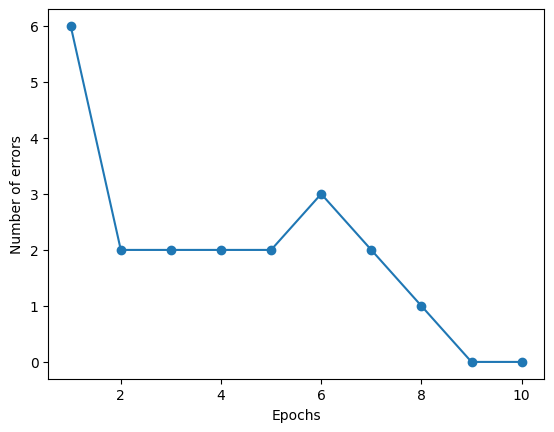

In [69]:
ppn.show_errors()

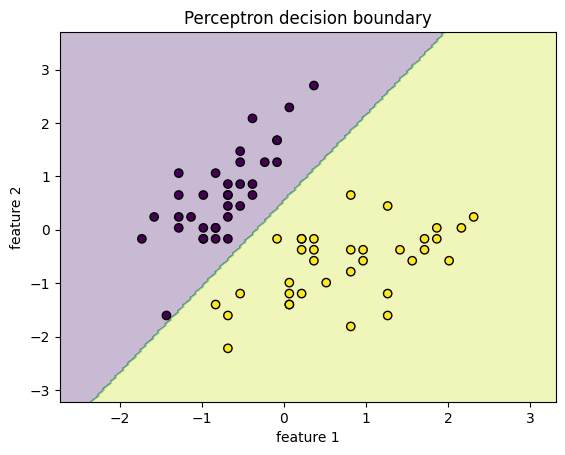

In [70]:
ppn.show_decision_boundary(X_train_scaled, y_train)

In [71]:
y_pred = ppn.predict(X_test_scaled)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Perceptron accuracy: {accuracy:.2f}")

Perceptron accuracy: 1.00


# Summary - Perfect Accuracy and Linear Separability

In this experiment, the perceptron reached a perfect accuracy of **1.00** on the selected subset of the Iris dataset (the *setosa* and *versicolor* classes, using sepal length and sepal width as features). This happens because these two classes are **linearly separable** meaning a single straight line can completely separate them in this 2D feature space.

Since the perceptron is a **linear classifier**, it was able to find that straight decision boundary that divides the two classes with no mistakes. As a result, the model made zero errors, showing that the perceptron can perfectly solve problems where the data can be separated by a straight line.
